<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_B_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@title Defining Imports
#numpy
import numpy as np
#PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
#plotting
from matplotlib import pyplot as plt
#for performance timing
import time

In [ ]:
results = []

In [ ]:
#@title Setting Hyperparameters
hp_test = "lr = 3.5e-01" #@param {type:"string"}
learning_rate = 3.5e-01
epochs = 500
middle_layer = 105
batch_size = 25
data_step = .1

# Creating Data

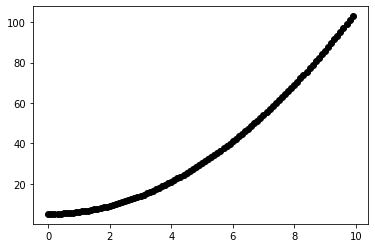

In [ ]:
#@title Creating data from function and reshaping
def function(X):
  return X * X + 5.

X = np.reshape(np.arange(0,10, data_step), (-1, 1))
y = function(X)
inputs = X.shape[1]
y = y.reshape(-1, 1)
plt.plot(X, y, 'o', color='black')

In [ ]:
tensor_x = torch.Tensor(X) # transform to torch tensor
tensor_y = torch.Tensor(y)

dataset = TensorDataset(tensor_x,tensor_y) # create your datset
dataloader = DataLoader(dataset, batch_size= batch_size, shuffle=True) # create your dataloader

# Building the Model

In [ ]:
#@title Define the Model
class Net(nn.Module):
  def __init__(self, inputs, middle):
    super().__init__()
    self.fc1 = nn.Linear(inputs,middle)    
    self.fc2 = nn.Linear(middle,middle)    
    self.out = nn.Linear(middle,1)
  def forward(self, x):
    x = F.relu(self.fc1(x))     
    x = F.relu(self.fc2(x))    
    x = self.out(x)
    return x

In [ ]:
#@title Create the model
model = Net(inputs, middle_layer)
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=105, bias=True)
  (fc2): Linear(in_features=105, out_features=105, bias=True)
  (out): Linear(in_features=105, out_features=1, bias=True)
)


In [ ]:
#@title Define loss function (criterion) and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

[0] Loss = 3115.638427734375
[1] Loss = 464.7024230957031
[2] Loss = 1209.6077880859375
[3] Loss = 181.87501525878906
[4] Loss = 519.5674438476562
[5] Loss = 570.9649047851562
[6] Loss = 954.278076171875
[7] Loss = 350.0603942871094
[8] Loss = 93.22032165527344
[9] Loss = 41.69596862792969
[10] Loss = 55.856285095214844
[11] Loss = 109.22935485839844
[12] Loss = 40.235836029052734
[13] Loss = 26.712745666503906
[14] Loss = 15.705065727233887
[15] Loss = 10.939143180847168
[16] Loss = 6.551648139953613
[17] Loss = 9.464944839477539
[18] Loss = 6.1533613204956055
[19] Loss = 9.541659355163574
[20] Loss = 9.565526962280273
[21] Loss = 6.510894298553467
[22] Loss = 5.664587497711182
[23] Loss = 3.8165788650512695
[24] Loss = 5.052399158477783
[25] Loss = 3.3101367950439453
[26] Loss = 4.523299694061279
[27] Loss = 4.679783821105957
[28] Loss = 3.4932291507720947
[29] Loss = 3.976684331893921
[30] Loss = 2.9547460079193115
[31] Loss = 2.8210463523864746
[32] Loss = 1.7287706136703491
[33] L

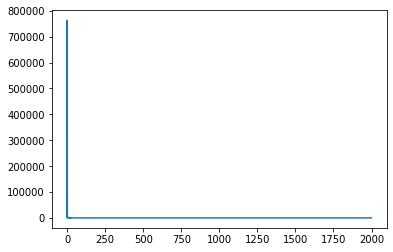

In [ ]:
#@title Training the Model
history = []
start = time.time()
for i in range(epochs):        
  for X, y in iter(dataloader):
    # wrap the data in variables
    x_batch = Variable(torch.Tensor(X))
    y_batch = Variable(torch.Tensor(y))                   
    # forward pass
    y_pred = model(x_batch)        
    # compute and print loss
    loss = loss_fn(y_pred, y_batch)  
    history.append(loss.data)         
    # reset gradients
    optimizer.zero_grad()        
    # backwards pass
    loss.backward()        
    # step the optimizer - update the weights
    optimizer.step()
  print(f"[{i}] Loss = {loss.data}")
plt.plot(history)
end = time.time() - start

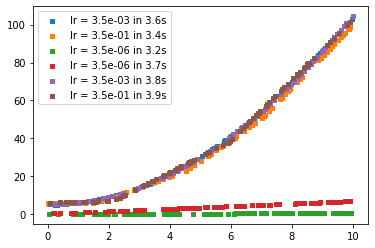

In [ ]:
X_a = torch.rand(100,1).clone() * 10
y_a = model(X_a)
y_a = y_a.detach().numpy()
results.append([hp_test,end, X_a, y_a])

fig = plt.figure()
ax1 = fig.add_subplot(111)
for test,t,x,y in results:
  ax1.scatter(x, y, s=10, marker="s", label=f"{test} in {t:0.1f}s")

plt.legend(loc='upper left');
plt.show()